# Segundo examen

<div style="float: right;" markdown="1">
    <img src="https://github.com/restrepo/ComputationalMethods/raw/master/material/figures/leastaction_pendulum.svg?sanitize=true">
</div>
Un observador mirando el movimiento de un péndulo simple con una masa en el extremo de $0.2\ \text{Kg}$ y una longitud  $l=1\ \text{m}$, activa un cronómetro cuando el péndulo, oscilando de izquierda a derecha, se encuentra en su posición vertical. El observador detiene el cronómetro después de un tiempo de $t_f=0.5026\ \text{s}$, justo cuando el péndulo alcanza su máxima altura formando un ángulo de $\theta_0=10^\circ$ con respecto a la vertical. Por lo tanto $t_f=T/4$, donde , donde $T$ es el período de la oscilación del péndulo simple.

1. Minimizando la Acción del péndulo simple, la cual será explicada a continuación,  encuentre la trayectoria angular que describe el extremo del péndulo durante el tiempo de observación: en el plano del ángulo barrido en radianes en función del tiempo esquematizado en la figura. 
2. Grafique dicha trayectoria en plano $\theta(t)$ vs $t$ y compare con la superposición del gráfico de la ecuación de movimiento $\theta(t)=\theta_0 \sin(\omega t)$, donde $\omega$ es la frecuencia angular de la oscilación del péndulo simple, dada por $\omega=2\pi/T$.
3. Compruebe que la trayectoría que minimiza la Acción también conserva la energía total: $E=K+V$, donde $K$ es la energía cinética del péndulo y $V$ es su energía potencial.

## Acción para un péndulo simple

<div style="float: right;" markdown="1">
    <img src="https://github.com/restrepo/ComputationalMethods/raw/master/material/figures/pendulum.png">
</div>
Vamos a tomar como origen del sistema de referencia el extremo inferior del péndulo en su posición vertical. Por lo tanto, la altura del extremo inferior del péndulo a un ángulo $\theta$ com se muestra en la figura, es
$$
y=l-l\cos\theta=l(1-\cos\theta)\,.
$$
Entonces

* Energía potencial
$$
V=mgy=mgl(1-\cos\theta).
$$
* Como la velocidad de la masa es $v=l\dot\theta$, tenemos que la energía cinética es
$$
K=\frac{1}{2}m v^2=\frac{1}{2}ml^2\dot\theta^2\,,
$$
donde $\dot\theta=d\theta/dt\,.$. 

La Lagrangiana, en función de las coordenadas generalizadas $\theta$ y $\dot\theta$ es
$$
L=K-V=\frac{1}{2}ml^2\dot\theta^2-mgl(1-\cos\theta)\,,
$$
y, finalmente, la Acción a minimizar para encontrar la trayectoria física $\theta(t)$, es
$$
S=\int_0^{t_f} L\,\operatorname{d}t\,.
$$

Para los detalles ver: http://www.aoengr.com/Dynamics/LagrangianMechanicsPendulum.pdf

## Solución
* https://en.wikipedia.org/wiki/Pendulum_(mathematics)
* https://es.wikipedia.org/wiki/P%C3%A9ndulo_simple
* http://www.aoengr.com/Dynamics/LagrangianMechanicsPendulum.pdf

0) Preámbulo

In [306]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [307]:
from scipy import interpolate
from scipy.misc import derivative
from scipy import integrate
import numpy as np

Como en el caso de caida libre definimos la Acción

In [308]:
def S(θ,t1=0,t2=0.502,m=0.2,l=1,θini=0,θend=0.175,g=9.80665):
    θ=np.asarray(θ)
    t=np.linspace(t1,t2,θ.shape[0])
    Δt=t[1:]-t[:-1]
    #Fix initial and final point
    θ[0]=θini
    θ[-1]=θend
    T=0.5*m*l**2*(θ[1:]-θ[:-1])**2/Δt**2
    V=m*g*l*( 1- np.cos( θ[1:] ) )
    return np.dot( ( T - V ), Δt) 

y la función para minimizar la acción con `fmin_powell`

In [309]:
import scipy.optimize as optimize
def θfit(n,t1=0,t2=0.502,θ0=[],m=0.2,l=1,θini=0,θend=0.175,ftol=1E-8,full_output=1):
    '''Find the array of n components that minimizes the action S(x)

    :Parameters:

    n: int
        dimension of the ndarray θ  that minimizes the action  
            S(θ,t1,t2,θ0,m,l)
    θ,t1,t2,θ0,m,l: numbers
       optional parameters for the action
    θ0: list of len n: 
        Initial guess to start the minimization
    θini:
        Initial boundary condition
    θend:
        Final boundary condition
        
    ftol: number
        acceptable relative error in S(x) for convergence.
    full_output: int
        Parameter to be passed to `fmin_powell`

    :Returns: a
    
    a: tuple 
        with the `fmin_powell` according to `full_output` option        
    '''  
    if len(θ0)==0:
        θ0=np.zeros(n)
    a=optimize.fmin_powell(S,θ0,args=(t1,t2,m,l,θini,θend),ftol=ftol,full_output=full_output)
    θ=a[0]
    θ[0]=θini;θ[-1]=θend
    Smin=a
    return Smin

In [310]:
θ_0=10*np.pi/180
θ_0

0.17453292519943295

Para generalizar a cualquier ángulo usaremos la expresión analítica para calcular el período de un péndulo simple para cualquier amplitud. Para pequeñas oscilaciones el período es independiente del ángulo máximo, $\theta_0$, pero en general depende de ese ángulo de acuerdo a la siguiente integral tomada de la [Wikipedia](https://en.wikipedia.org/wiki/Pendulum_(mathematics)#Arbitrary-amplitude_period)
$$
T(\theta_0)=\frac{2T_0}{\pi}\int_0^{\pi/2} \frac{1}{1-\sin^2(\theta_0/2)\sin^2u}\operatorname{d}u\,, 
$$
donde 
$$
T_0=2\pi\sqrt{\frac{l}{g}}\qquad\to\qquad \omega^2=(\frac{2\pi}{T_0})^2=\frac{g}{l}\,,
$$
es el período de oscilación para pequeñas oscilaciones.

Por consiguiente, $T(\theta_0)/4$ es el tiempo que mide el observado a un determinado ángulo máximo $\theta_0$,

A continuación implementamos dicha integral

In [313]:
def T0(l,g=9.80665):
    return 2*np.pi*np.sqrt(l/g)
def T(θ,l=1,g=9.80665):
    k=np.sin(θ/2)
    return (2*T0(l,g)/np.pi)*integrate.quad(lambda u:(1)/(np.sqrt(1-k**2*np.sin(u)**2)),0,np.pi/2)[0]    

y ahora podemos comprobar el periódo obtenido por el observador

In [316]:
g=9.80665
l=1
ω=2*np.pi/T(θ_0)
ω0=2*np.pi/T0(l,g)
θ_0,ω**2,ω0**2,T(θ_0),T0(l,g)

(0.17453292519943295,
 9.769350486461288,
 9.806649999999996,
 2.010235892602306,
 2.0064092925890407)

correspondiente a un $t_f$

In [237]:
round(T(θ_0)/4,4)

0.5026

que difiere del esperado para oscilaciones pequeñas en una milésima de segundo

In [238]:
round( T0(l,g)/4,4)

0.5016

Procedemos a comprobar la definición de la Acción

In [239]:
S([0.,0.1,0.15,0.175])

-0.0024939600478661858

1) Ahora haremos la minimización de la Acción con 20 puntos

In [240]:
a=θfit(20,t1=0,t2=T(θ_0)/4,m=0.2,l=1,θini=0,θend=θ_0,ftol=1E-16)
θ=a[0]
θ

Optimization terminated successfully.
         Current function value: -0.000413
         Iterations: 35
         Function evaluations: 9628


array([0.        , 0.01442607, 0.02875316, 0.04288301, 0.05671872,
       0.0701655 , 0.08313127, 0.09552733, 0.10726897, 0.11827605,
       0.12847353, 0.13779198, 0.14616802, 0.15354477, 0.15987218,
       0.16510738, 0.16921492, 0.172167  , 0.17394367, 0.17453293])

2) Gráfico de la trayectoria física y comparación con la ecuación de movimiento

Text(0,0.5,'$\\theta(t)$ [rad]')

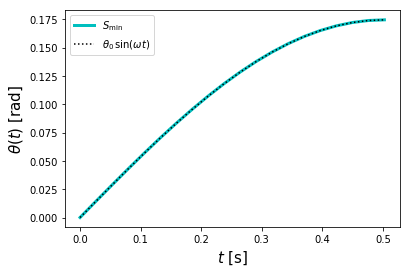

In [241]:
t=np.linspace(0,T(θ_0)/4,θ.shape[0])
plt.plot( t,θ,'c-',lw=3,label=r'$S_{\rm min}$'  )

plt.plot( t, θ_0*np.sin(ω*t),'k:',label=r'$\theta_0\,\sin(\omega t)$' )
plt.legend()
plt.xlabel('$t$ [s]' ,size=15)
plt.ylabel(r'$\theta(t)$ [rad]' ,size=15)

Action of equation of movement

In [242]:
S(θ_0*np.sin(ω*tt),t1=0,t2=T(θ_0/4),m=0.2, l=1, θini=0, θend=θ_0, g=g)

0.11527081776209697

Check Action minimization

In [243]:
S(θ,t1=0,t2=T(θ_0)/4,m=0.2, l=1, θini=0, θend=θ_0, g=g)

-0.000412605731145421

3) Energy

In [285]:
from scipy.misc import derivative
def fullderivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        nn=np.array(x0).shape[0] # force error if float is used 
        fp=np.vectorize(derivative)
    except IndexError:
        fp=derivative
        
    return fp(func,x0,**kwargs)

In [286]:
theta=interpolate.interp1d(t,θ)

In [287]:
tavg=0.5*(t[1:]+t[:-1])
θavg=0.5*(θ[1:]+θ[:-1])

In [291]:
dotθ=fullderivate(theta,tavg,dx=1E-3)

* Energía cinética
$$
K=\frac{1}{2}ml^2\dot\theta^2\,,
$$
* Energía potencial
$$
V=mgl(1-\cos\theta).
$$

In [292]:
g=9.80665
l=1
m=0.2
E=0.5*m*l**2*dotθ**2+m*g*l*(1-np.cos(θavg))
E

array([0.02979706, 0.02979636, 0.02979498, 0.02979295, 0.02979034,
       0.02978722, 0.02978368, 0.02977981, 0.02977572, 0.02977153,
       0.02976735, 0.02976329, 0.02975947, 0.02975598, 0.02975293,
       0.02975037, 0.0297484 , 0.02974706, 0.02974638])

In [294]:
tpavg=0.5*(tavg[1:]+tavg[:-1])
θpavg=0.5*(θavg[1:]+θavg[:-1])

In [299]:
dotθavg=interpolate.interp1d(tavg,dotθ)

In [300]:
α=fullderivate(dotθavg,tpavg,dx=1E-6)

$\omega^2=-\alpha/\theta$

In [305]:
ω**2

9.769350486461288

In [302]:
-α/θpavg

array([9.82327816, 9.82212351, 9.82052527, 9.81822447, 9.81539467,
       9.81218144, 9.80853091, 9.80463689, 9.80058716, 9.79644219,
       9.79240907, 9.78849792, 9.7848629 , 9.78161244, 9.77887956,
       9.77661082, 9.77495753, 9.77395561])

Text(0.5,0,'$t$ [s]')

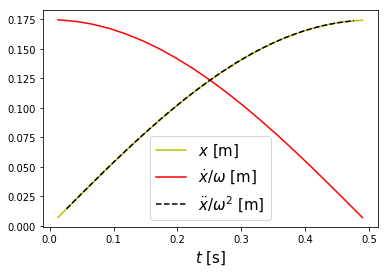

In [317]:
plt.plot(tavg,θavg,'y-',label=r'$x$ [m]')
plt.plot(tavg,dotθ/ω,'r-',label=r'$\dot{x}/\omega$ [m]')
#plt.plot(tavg,E,'b--',label=r'E')
plt.plot(tpavg,-α/ω**2,'k--',label=r'$\ddot{x}/\omega^2$ [m]')
plt.legend(loc='best',fontsize=15) 
plt.xlabel(r'$t$ [s]',size=15 )

(0, 1)

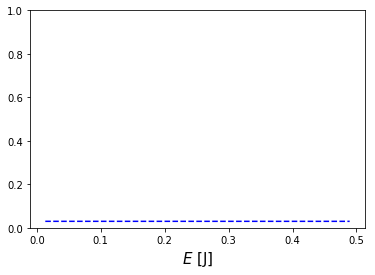

In [318]:
plt.plot(tavg,E,'b--')
plt.xlabel(r'$t$ [s]',size=15 )
plt.xlabel(r'$E$ [J]',size=15 )
plt.ylim(0,1)

## Extra
Check the other intervals

In [79]:
a=θfit(30,t1=T(θ_0)/4,t2=2*T(θ_0)/4,θ0=θ,m=0.2,l=1,θini=θ_0,θend=0,ftol=1E-16)
θ=a[0]
θ

Optimization terminated successfully.
         Current function value: 0.000376
         Iterations: 34
         Function evaluations: 9176


array([0.17453293, 0.17394367, 0.172167  , 0.16921491, 0.16510738,
       0.15987218, 0.15354476, 0.14616801, 0.13779197, 0.12847353,
       0.11827605, 0.10726897, 0.09552733, 0.08313127, 0.0701655 ,
       0.05671873, 0.04288301, 0.02875316, 0.01442607, 0.        ])

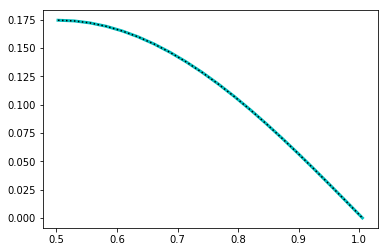

In [81]:
t=np.linspace(T(θ_0)/4,2*T(θ_0)/4,θ.shape[0])
plt.plot( t,θ,'c-',lw=3  )
θsol=θ_0*np.sin(ω*t)
plt.plot( t, θsol,'k:' )

In [82]:
a=θfit(30,t1=2*T(θ_0)/4,t2=3*T(θ_0)/4,θ0=θ,m=0.2,l=1,θini=0,θend=-θ_0,ftol=1E-16)
θ=a[0]
θ

Optimization terminated successfully.
         Current function value: -0.000413
         Iterations: 35
         Function evaluations: 9112


array([ 0.        , -0.01442607, -0.02875316, -0.04288301, -0.05671873,
       -0.07016551, -0.08313127, -0.09552733, -0.10726897, -0.11827605,
       -0.12847353, -0.13779197, -0.14616802, -0.15354477, -0.15987218,
       -0.16510738, -0.16921492, -0.172167  , -0.17394367, -0.17453293])

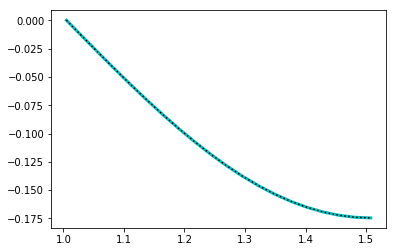

In [83]:
t=np.linspace(2*T(θ_0)/4,3*T(θ_0)/4,θ.shape[0])
plt.plot( t,θ,'c-',lw=3  )
θsol=θ_0*np.sin(ω*t)
plt.plot( t, θsol,'k:' )

In [84]:
a=θfit(30,t1=3*T(θ_0)/4,t2=4*T(θ_0)/4,θ0=θ,m=0.2,l=1,θini=-θ_0,θend=0,ftol=1E-16)
θ=a[0]
θ

Optimization terminated successfully.
         Current function value: 0.000376
         Iterations: 35
         Function evaluations: 9862


array([-0.17453293, -0.17394367, -0.172167  , -0.16921491, -0.16510738,
       -0.15987218, -0.15354477, -0.14616802, -0.13779198, -0.12847353,
       -0.11827605, -0.10726897, -0.09552733, -0.08313127, -0.0701655 ,
       -0.05671873, -0.04288301, -0.02875316, -0.01442607,  0.        ])

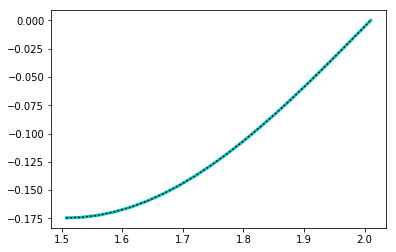

In [85]:
t=np.linspace(3*T(θ_0)/4,4*T(θ_0)/4,θ.shape[0])
plt.plot( t,θ,'c-',lw=3  )
θsol=θ_0*np.sin(ω*t)
plt.plot( t, θsol,'k:' )

Increase $\theta_0$

In [86]:
θ_0=40*np.pi/180
g=9.80665
l=1
ω=2*np.pi/T(θ_0)
θ_0,ω,T(θ_0),T0(l,g)

(0.6981317007977318, 3.0363949273597055, 2.069291201406111, 2.0064092925890407)

In [87]:
a=θfit(20,t1=0,t2=T(θ_0)/4,m=0.2,l=1,θini=0,θend=θ_0,ftol=1E-16)
θ=a[0]
θ

Optimization terminated successfully.
         Current function value: -0.010004
         Iterations: 36
         Function evaluations: 9647


array([0.        , 0.05827341, 0.11612342, 0.1731311 , 0.22888638,
       0.28299215, 0.3350679 , 0.38475302, 0.43170948, 0.47562398,
       0.51620957, 0.55320677, 0.58638416, 0.61553865, 0.64049543,
       0.66110769, 0.67725621, 0.6888489 , 0.6958204 , 0.6981317 ])

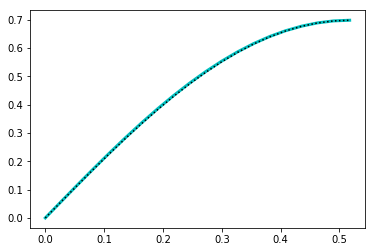

In [88]:
t=np.linspace(0,T(θ_0)/4,θ.shape[0])
plt.plot( t,θ,'c-',lw=3  )
plt.plot( t, θ_0*np.sin(ω*t),'k:' )

La solución analítica corresponde a la ecuación de movimiento:
$$x=\sin(\omega t)/2$$
y será usada para comparar con el resultado numérico obtenido

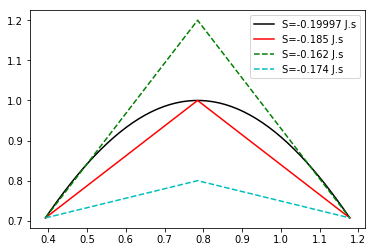

In [4]:
xmin=0.70710678118654757
xmax=xmin
tmin=np.pi/8;tmax=3*np.pi/8
m=0.2
k=0.8
ω=np.sqrt(k/m)
t=np.linspace(tmin,tmax)

plt.plot(t,sin(ω*t),'k-', label='S={} J.s'.format(round( S( sin(ω*t) ),5 ) )  )

tt=np.array( [tmin,2*tmin,3*tmin])
X=np.array( [xmin,1,xmax])
plt.plot(tt,X,'r-',label='S={} J.s'.format(round( S(X),3 ) ) )

X=np.array( [xmin,1.2,xmax])
plt.plot(tt,X,'g--',label='S={} J.s'.format(round( S(X),3 ) ) )

X=np.array( [xmin,0.8,xmax])
plt.plot(tt,X,'c--',label='S={} J.s'.format(round( S(X),3 ) ) )



plt.legend(loc='best')

In [6]:
Smin=xfit(51,t1=np.pi/8,t2=3*np.pi/8,m=0.2,k=0.8,xini=0.70710678118654757,xend=0.70710678118654757,ftol=1E-6)

Optimization terminated successfully.
         Current function value: -0.199974
         Iterations: 64
         Function evaluations: 32066


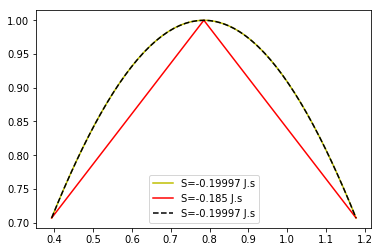

In [7]:
xmin=0.70710678118654757
xmax=xmin
tmin=np.pi/8;tmax=3*np.pi/8

m=0.2
k=0.8
ω=np.sqrt(k/m)
t=np.linspace(tmin,tmax)

plt.plot(t,sin(ω*t),'y-', label='S={} J.s'.format(round( S( sin(ω*t) ),5 ) )  )
X=np.array( [xmin,1,xmax])
tt=np.array( [np.pi/8,np.pi/4,np.pi/8+np.pi/4])
plt.plot(tt,X,'r-',label='S={} J.s'.format(round( S(X),3 ) ) )

t=np.linspace(tmin,tmax,Smin[0].shape[0])
plt.plot(t,Smin[0],'k--', label='S={} J.s'.format(round( Smin[2] ,5 ) )  )

plt.legend(loc='best')

Equation of motion

In [8]:
x=Smin[0]

for

In [9]:
t=np.linspace(tmin,tmax,Smin[0].shape[0])

In [10]:
def derivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    from scipy.misc import derivative
    try:
        nn=np.array(x0).shape[0] # force error if float is used 
        fp=np.vectorize(derivative)
    except IndexError:
        fp=derivative
        
    return fp(func,x0,**kwargs)



def interpol1d_to_function(x0,x=[0,1,2],y=[0,1,2],full_range=False):
    '''
    Converts interpolation to function
    '''
    return interpolate.interp1d(x,y)(x0)

In [11]:
x.shape,t.shape

((51,), (51,))

In [12]:
tavg=0.5*(t[1:]+t[:-1])
xavg=0.5*(x[1:]+x[:-1])

##  Appendix:

### Starting at time 0s

In [28]:
S?

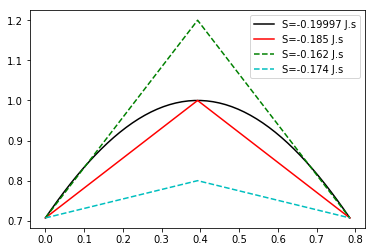

In [29]:
xmin=0.70710678118654757
xmax=xmin
tmin=0;tmax=np.pi/4
m=0.2
k=0.8
ω=np.sqrt(k/m)
t=np.linspace(tmin,tmax)

plt.plot(t,sin(ω*(t+ np.pi/8)) ,'k-', label='S={} J.s'.format(round( S( sin(ω*(t+ np.pi/8)),t1=0,t2=np.pi/4 ),5 ) )  )

tt=np.array( [tmin,np.pi/8,np.pi/4])
X=np.array( [xmin,1,xmax])
plt.plot(tt,X,'r-',label='S={} J.s'.format(round( S(X,t1=0,t2=np.pi/4),3 ) ) )

X=np.array( [xmin,1.2,xmax])
plt.plot(tt,X,'g--',label='S={} J.s'.format(round( S(X,t1=0,t2=np.pi/4),3 ) ) )

X=np.array( [xmin,0.8,xmax])
plt.plot(tt,X,'c--',label='S={} J.s'.format(round( S(X, t1=0,t2=np.pi/4),3 ) ) )



plt.legend(loc='best')

In [203]:
def interpol1d_to_function(x0,x=[0,1,2],y=[0,1,2],full_range=False):
    '''
    Converts interpolation to function
    #Returns the evaluation of the interpolated function(*args,**kwargs)
    #in an array x0 even when some value inside 
    '''
    #try:
    #if True:
    return interpolate.interp1d(x,y)(x0)
    #except ValueError:
    #    return 0

    
m=0.2
k=0.8
ω=np.sqrt(k/m)
    
#x=[xini,1,xend]
#if True:    
#    t1=np.pi/8;t2=3*np.pi/8;m=0.2;k=0.8;xini=0.70710678118654757;xend=0.70710678118654757    
def S(x,t1=np.pi/8,t2=3*np.pi/8,m=0.2,k=0.8,xini=0.70710678118654757,xend=0.70710678118654757):    
    x=np.asarray(x)
    t=np.linspace(t1,t2,x.shape[0])
    def X(t0):
        return interpol1d_to_function(t0,t,x)
    
    t0=0.5*(t[1:]+t[:-1])
    SS=integrate.trapz( 0.5*m*derivate(X,t0,dx=1E-6 )**2-0.5*k*X(t0)**2,t0 )
    return SS